In [0]:
import torch 
import matplotlib.pylab as plt

In [4]:
x = torch.tensor(2.0, requires_grad = True)
x

tensor(2., requires_grad=True)

In [6]:
y = x**2
y

tensor(4., grad_fn=<PowBackward0>)

In [7]:
y.backward()
x.grad

tensor(4.)

In [9]:
print('data:', x.data)
print('grad_fn:', x.grad_fn)
print('grad',x.grad)
print("is_leaf:",x.is_leaf)
print("required_grad:", x.requires_grad)

data: tensor(2.)
grad_fn: None
grad tensor(4.)
is_leaf: True
required_grad: True


In [10]:
print('data:', y.data)
print('grad_fn:', y.grad_fn)
print('grad',y.grad)
print("is_leaf:",y.is_leaf)
print("required_grad:", y.requires_grad)

data: tensor(4.)
grad_fn: <PowBackward0 object at 0x7fc697552208>
grad None
is_leaf: False
required_grad: True


In [12]:
x = torch.tensor(2.0, requires_grad = True)
y = x**2+2*x+1
print("The result of y = x^2+1: ",y)
y.backward()
x.grad

The result of y = x^2+1:  tensor(9., grad_fn=<AddBackward0>)


tensor(6.)

In [0]:
class SQ(torch.autograd.Function):

    @staticmethod
    def forward(ctx,i):
        result=i**2
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        i, = ctx.saved_tensors
        grad_output =2*i
        return grad_output

In [21]:
x=torch.tensor(2.0,requires_grad=True )
sq=SQ.apply

y=sq(x)
y
print(y.grad_fn)
y.backward()
x.grad

tensor(4.)

In [27]:
u = torch.tensor(1.0,requires_grad=True)
v = torch.tensor(2.0,requires_grad=True)
f = u * v + u ** 2
f

tensor(3., grad_fn=<AddBackward0>)

In [28]:
f.backward()
u.grad

tensor(4.)

In [30]:
v.grad

tensor(1.)

In [0]:
x=torch.linspace(-10,10,10, requires_grad=True)
Y = x**2
y = torch.sum(x**2)

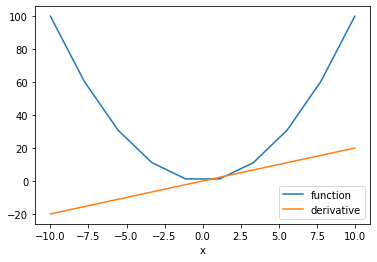

In [32]:
y.backward()

plt.plot(x.detach().numpy(),Y.detach().numpy(), label='function')
plt.plot(x.detach().numpy(),x.grad.detach().numpy(), label='derivative')
plt.xlabel('x')
plt.legend()
plt.show()


In [34]:
y.grad_fn

In [38]:
u =torch.tensor(2.0, requires_grad = True)
v =torch.tensor(1.0, requires_grad = True)

f = u*v + (u*v)**2

f.backward()
u.grad

tensor(5.)